### Using pre-trained HF vae

In [13]:
import huggingface_hub
import torch
from get_vae import get_vae
import sys
import os
sys.path.append(os.path.abspath('../data'))
import dataloader

dataset = dataloader.ImageDataset(None,'raw_images',
                                  label_folder='../data/label_folder',
                                  im_extension='jpeg',
                                  use_latents=True,
                                  latent_folder='../data/latent_folder_sdxl',
                                  device='cpu')
full_vae, encoder = get_vae()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12.002044..16.78721].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0874937..0.815207].


torch.Size([1, 4, 32, 32]) torch.Size([3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14.887081..17.92659].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11195281..0.91997355].


torch.Size([1, 4, 32, 32]) torch.Size([3, 256, 256])


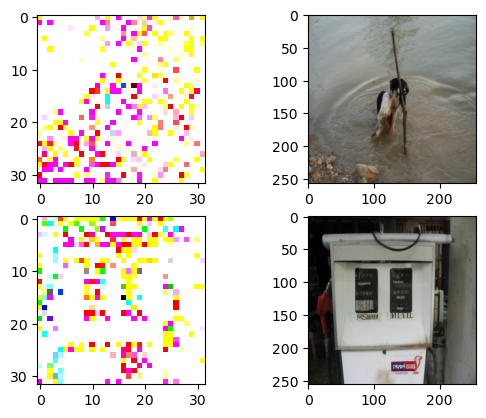

In [18]:
import matplotlib.pyplot as plt
import torchvision
fig,ax = plt.subplots(2,2)


# outputs x,loss
for i in range(2):
    ind = torch.randint(0,len(dataset),size=(1,))
    datapt = dataset[ind][0]
    model_out = full_vae.decode(datapt.to('cpu'))[0].to('cpu')
    print(datapt.shape,model_out.shape)
    with torch.no_grad():
        ax[i][0].imshow(datapt.squeeze(0).permute(1,2,0))
        ax[i][1].imshow(model_out.permute(1,2,0))

